In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("C:/Users/sreeh/Downloads/NBAShotLocations.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4729512 entries, 0 to 4729511
Data columns (total 22 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   Game ID            int64 
 1   Game Event ID      int64 
 2   Player ID          int64 
 3   Player Name        object
 4   Team ID            int64 
 5   Team Name          object
 6   Period             int64 
 7   Minutes Remaining  int64 
 8   Seconds Remaining  int64 
 9   Action Type        object
 10  Shot Type          object
 11  Shot Zone Basic    object
 12  Shot Zone Area     object
 13  Shot Zone Range    object
 14  Shot Distance      int64 
 15  X Location         int64 
 16  Y Location         int64 
 17  Shot Made Flag     int64 
 18  Game Date          int64 
 19  Home Team          object
 20  Away Team          object
 21  Season Type        object
dtypes: int64(12), object(10)
memory usage: 793.8+ MB


In [4]:
df.head()

,Game ID,Game Event ID,Player ID,Player Name,Team ID,Team Name,Period,Minutes Remaining,Seconds Remaining,Action Type,...,Shot Zone Area,Shot Zone Range,Shot Distance,X Location,Y Location,Shot Made Flag,Game Date,Home Team,Away Team,Season Type
0,29700427,389,100,Tim Legler,1610612764,Washington Wizards,4,11,22,Jump Shot,...,Right Side(R),8-16 ft.,15,117,109,1,19980102,WAS,IND,Regular Season
1,29700427,406,100,Tim Legler,1610612764,Washington Wizards,4,9,36,Jump Shot,...,Right Side(R),8-16 ft.,14,143,25,0,19980102,WAS,IND,Regular Season
2,29700427,475,100,Tim Legler,1610612764,Washington Wizards,4,3,7,Jump Shot,...,Left Side(L),8-16 ft.,10,-87,55,0,19980102,WAS,IND,Regular Season
3,29700427,487,100,Tim Legler,1610612764,Washington Wizards,4,1,45,Jump Shot,...,Center(C),Less Than 8 ft.,5,-1,53,0,19980102,WAS,IND,Regular Season
4,29700427,497,100,Tim Legler,1610612764,Washington Wizards,4,0,45,Jump Shot,...,Right Side(R),8-16 ft.,14,89,113,0,19980102,WAS,IND,Regular Season


In [5]:
df = df.dropna()

In [6]:
teams = df['Team Name'].unique()
teams

array(['Washington Wizards', 'Utah Jazz', 'San Antonio Spurs',
       'Atlanta Hawks', 'Toronto Raptors', 'Portland Trail Blazers',
       'New York Knicks', 'Houston Rockets', 'Phoenix Suns', 'Miami Heat',
       'Cleveland Cavaliers', 'Milwaukee Bucks', 'Los Angeles Clippers',
       'Philadelphia 76ers', 'Denver Nuggets', 'Golden State Warriors',
       'Orlando Magic', 'Dallas Mavericks', 'Seattle SuperSonics',
       'Sacramento Kings', 'Los Angeles Lakers', 'Vancouver Grizzlies',
       'Charlotte Hornets', 'New Jersey Nets', 'Chicago Bulls',
       'Indiana Pacers', 'Boston Celtics', 'Detroit Pistons',
       'Minnesota Timberwolves', 'Memphis Grizzlies',
       'New Orleans Hornets', 'Charlotte Bobcats',
       'New Orleans/Oklahoma City Hornets', 'Oklahoma City Thunder',
       'Brooklyn Nets', 'New Orleans Pelicans', 'LA Clippers'],
      dtype=object)

In [7]:
# Calculate total 3-point attempts
three_point_attempts = df.groupby(['Season Type', 'Team Name']).apply(lambda x: x[x['Shot Type'] == '3PT Field Goal'].shape[0]).reset_index(name='3PA')
three_point_attempts

,Season Type,Team Name,3PA
0,Playoffs,Atlanta Hawks,2197
1,Playoffs,Boston Celtics,4224
2,Playoffs,Brooklyn Nets,722
3,Playoffs,Charlotte Bobcats,153
4,Playoffs,Charlotte Hornets,520
...,...,...,...
67,Regular Season,Seattle SuperSonics,15612
68,Regular Season,Toronto Raptors,36132
69,Regular Season,Utah Jazz,29539
70,Regular Season,Vancouver Grizzlies,3196


In [8]:
# Calculate 3-point shooting percentage
three_point_makes = df[df['Shot Type'] == '3PT Field Goal'].groupby(['Season Type', 'Team Name']).size().reset_index(name='3PM')
three_point_accuracy = pd.merge(three_point_attempts, three_point_makes, on=['Season Type', 'Team Name'])
three_point_accuracy['3P%'] = three_point_accuracy['3PM'] / three_point_accuracy['3PA']
three_point_accuracy

,Season Type,Team Name,3PA,3PM,3P%
0,Playoffs,Atlanta Hawks,2197,2197,1.0
1,Playoffs,Boston Celtics,4224,4224,1.0
2,Playoffs,Brooklyn Nets,722,722,1.0
3,Playoffs,Charlotte Bobcats,153,153,1.0
4,Playoffs,Charlotte Hornets,520,520,1.0
...,...,...,...,...,...
67,Regular Season,Seattle SuperSonics,15612,15612,1.0
68,Regular Season,Toronto Raptors,36132,36132,1.0
69,Regular Season,Utah Jazz,29539,29539,1.0
70,Regular Season,Vancouver Grizzlies,3196,3196,1.0


In [9]:
# Calculate total games played
total_games = df.groupby(['Season Type', 'Team Name']).agg({'Game ID': 'nunique'}).reset_index()
total_games.rename(columns={'Game ID': 'GP'}, inplace=True)
total_games

,Season Type,Team Name,GP
0,Playoffs,Atlanta Hawks,105
1,Playoffs,Boston Celtics,192
2,Playoffs,Brooklyn Nets,30
3,Playoffs,Charlotte Bobcats,8
4,Playoffs,Charlotte Hornets,39
...,...,...,...
67,Regular Season,Seattle SuperSonics,870
68,Regular Season,Toronto Raptors,1820
69,Regular Season,Utah Jazz,1820
70,Regular Season,Vancouver Grizzlies,296


In [10]:
# Calculate number of wins
wins = df[df['Shot Made Flag'] == 1].groupby(['Season Type', 'Team Name']).agg({'Game ID': 'nunique'}).reset_index()
wins.rename(columns={'Game ID': 'W'}, inplace=True)
wins

,Season Type,Team Name,W
0,Playoffs,Atlanta Hawks,105
1,Playoffs,Boston Celtics,192
2,Playoffs,Brooklyn Nets,30
3,Playoffs,Charlotte Bobcats,8
4,Playoffs,Charlotte Hornets,39
...,...,...,...
67,Regular Season,Seattle SuperSonics,870
68,Regular Season,Toronto Raptors,1820
69,Regular Season,Utah Jazz,1820
70,Regular Season,Vancouver Grizzlies,296


In [11]:
# Calculate winning percentage
winning_percentage = pd.merge(total_games, wins, on=['Season Type', 'Team Name'])
winning_percentage['WIN%'] = winning_percentage['W'] / winning_percentage['GP']
winning_percentage

,Season Type,Team Name,GP,W,WIN%
0,Playoffs,Atlanta Hawks,105,105,1.0
1,Playoffs,Boston Celtics,192,192,1.0
2,Playoffs,Brooklyn Nets,30,30,1.0
3,Playoffs,Charlotte Bobcats,8,8,1.0
4,Playoffs,Charlotte Hornets,39,39,1.0
...,...,...,...,...,...
67,Regular Season,Seattle SuperSonics,870,870,1.0
68,Regular Season,Toronto Raptors,1820,1820,1.0
69,Regular Season,Utah Jazz,1820,1820,1.0
70,Regular Season,Vancouver Grizzlies,296,296,1.0


In [12]:
# Merge dataframes
df_merged = pd.merge(three_point_accuracy, winning_percentage, on=['Season Type', 'Team Name'])
df_merged

,Season Type,Team Name,3PA,3PM,3P%,GP,W,WIN%
0,Playoffs,Atlanta Hawks,2197,2197,1.0,105,105,1.0
1,Playoffs,Boston Celtics,4224,4224,1.0,192,192,1.0
2,Playoffs,Brooklyn Nets,722,722,1.0,30,30,1.0
3,Playoffs,Charlotte Bobcats,153,153,1.0,8,8,1.0
4,Playoffs,Charlotte Hornets,520,520,1.0,39,39,1.0
...,...,...,...,...,...,...,...,...
67,Regular Season,Seattle SuperSonics,15612,15612,1.0,870,870,1.0
68,Regular Season,Toronto Raptors,36132,36132,1.0,1820,1820,1.0
69,Regular Season,Utah Jazz,29539,29539,1.0,1820,1820,1.0
70,Regular Season,Vancouver Grizzlies,3196,3196,1.0,296,296,1.0


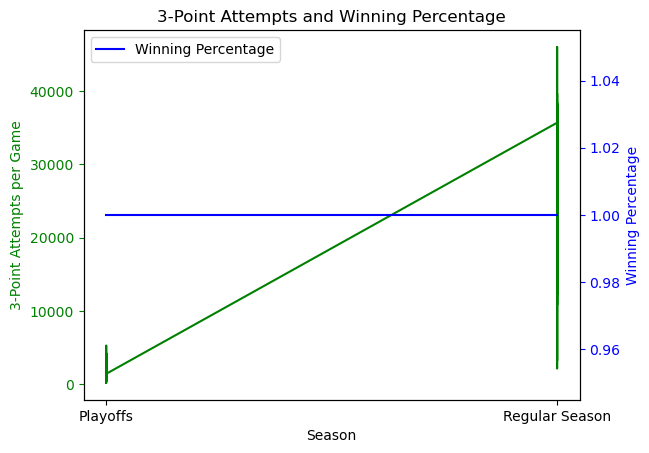

In [13]:
# Create line chart with two y-axes
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(df_merged['Season Type'], df_merged['3PA'], 'g-', label='3-Point Attempts per Game')
ax2.plot(df_merged['Season Type'], df_merged['WIN%'], 'b-', label='Winning Percentage')

ax1.set_xlabel('Season')
ax1.set_ylabel('3-Point Attempts per Game', color='g')
ax2.set_ylabel('Winning Percentage', color='b')

ax1.tick_params(axis='y', colors='g')
ax2.tick_params(axis='y', colors='b')

plt.title('3-Point Attempts and Winning Percentage')
plt.legend(loc='upper left')
plt.show()

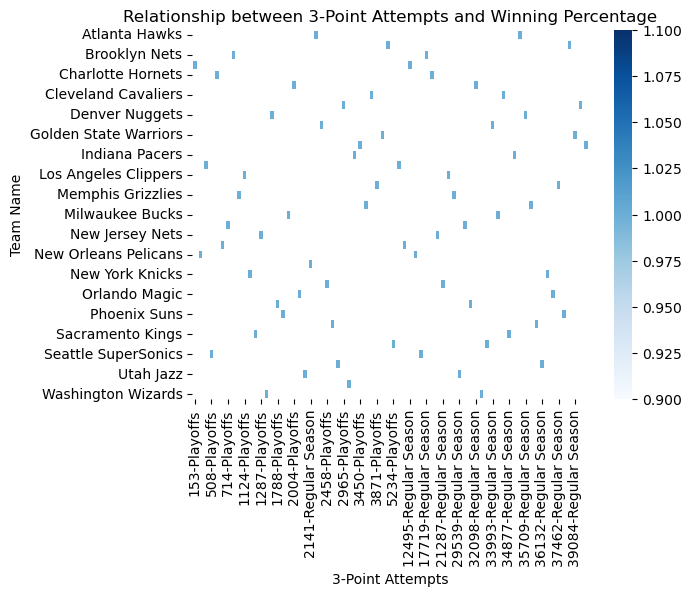

In [25]:
# Create a pivot table with 3-point attempts and winning percentage
pivot_table = pd.pivot_table(data= df_merged, values='WIN%', index='Team Name', columns=['3PA', 'Season Type'])

# Create a heatmap of the pivot table
sns.heatmap(data= pivot_table, cmap='Blues',  fmt='.0f', linewidths=0.2, cbar=True)
plt.xlabel('3-Point Attempts')
plt.ylabel('Team Name')
plt.title('Relationship between 3-Point Attempts and Winning Percentage')
plt.show()

9) How does a certain player on-court affect overall team shooting efficiency?
   * Good shooters create better shots for their teammates(opens up the floor)
   * Stepehen Curry is a good example of this
   * Is there a correlation between a player's on-court shooting efficiency and the team's overall shooting efficiency? - Haritha


In [16]:
# Calculate on-court shooting efficiency for each player
player_fg = df.groupby(['Season Type', 'Player Name']).agg({'Shot Made Flag': 'mean'}).reset_index()
player_fg.rename(columns={'Shot Made Flag': 'FG%'}, inplace=True)
player_fg

,Season Type,Player Name,FG%
0,Playoffs,A.C. Green,0.408602
1,Playoffs,AJ Price,0.378378
2,Playoffs,Aaron Brooks,0.415541
3,Playoffs,Aaron Gordon,0.467742
4,Playoffs,Aaron Gray,0.600000
...,...,...,...
3327,Regular Season,Zion Williamson,0.589041
3328,Regular Season,Zoran Dragic,0.366667
3329,Regular Season,Zoran Planinic,0.405350
3330,Regular Season,Zydrunas Ilgauskas,0.475797


In [18]:
# Calculate team shooting efficiency while each player is on the court
team_fg = df.groupby(['Season Type', 'Player Name']).apply(lambda x: x[x['Player Name'] == x['Player Name'].unique()[0]]['Shot Made Flag'].mean()).reset_index(name='Team FG%')
team_fg

,Season Type,Player Name,Team FG%
0,Playoffs,A.C. Green,0.408602
1,Playoffs,AJ Price,0.378378
2,Playoffs,Aaron Brooks,0.415541
3,Playoffs,Aaron Gordon,0.467742
4,Playoffs,Aaron Gray,0.600000
...,...,...,...
3327,Regular Season,Zion Williamson,0.589041
3328,Regular Season,Zoran Dragic,0.366667
3329,Regular Season,Zoran Planinic,0.405350
3330,Regular Season,Zydrunas Ilgauskas,0.475797


In [19]:
# Merge dataframes
player_team_fg = pd.merge(player_fg, team_fg, on=['Season Type', 'Player Name'])

player_team_fg

,Season Type,Player Name,FG%,Team FG%
0,Playoffs,A.C. Green,0.408602,0.408602
1,Playoffs,AJ Price,0.378378,0.378378
2,Playoffs,Aaron Brooks,0.415541,0.415541
3,Playoffs,Aaron Gordon,0.467742,0.467742
4,Playoffs,Aaron Gray,0.600000,0.600000
...,...,...,...,...
3327,Regular Season,Zion Williamson,0.589041,0.589041
3328,Regular Season,Zoran Dragic,0.366667,0.366667
3329,Regular Season,Zoran Planinic,0.405350,0.405350
3330,Regular Season,Zydrunas Ilgauskas,0.475797,0.475797


In [20]:
# Calculate correlation
correlation = player_team_fg['FG%'].corr(player_team_fg['Team FG%'])
print("Correlation between player's on-court shooting efficiency and team's overall shooting efficiency:", correlation)

Correlation between player's on-court shooting efficiency and team's overall shooting efficiency: 1.0
